# Проект: Исследование стартапов


**автор: Гущина Вера**

**18.06.2025**

## Введение

Финансовая компания, предоставляющая льготные займы стартапам, планирует войти на инвестиционный рынок с прицелом на покупку, развитие и последующую перепродажу перспективных стартапов. 

Для разработки модели бизнеса нужна информация. Чтобы выработать общее понимание, какие данные могут быть полезны, проводится исследование на исторических данных.

Представленные данные неполны, в связи с чем необходимо аккуратно относиться к получаемым в процессе исследования значениям показателей и выводам и стараться оценивать их на возможные искажения.

**Цель проекта**

*Подготовить датасет и проверить, что данные в нём соответствуют здравому смыслу, а также ответить на вопросы заказчика как о предобработке, так и о значении данных для бизнеса.*

*Необходимо принять решения:*
- по каким столбцам можно объединять данные из разных таблиц;
- можно ли доверять данным о сотрудниках стартапов и их образовании;
- что означают покупки за 0 или за 1 доллар;
- какая цена в зависимости от категории стартапов и количества раундов финансирования перед его покупкой;
- как рассчитать и отобразить численные показатели и динамику.

*Дополнительно:*
выявить показатели и признаки, которые указывают на повышенную вероятность успешной сделки по покупке компании.

**Описание данных**

Таблица [`acquisition`](https://code.s3.yandex.net/datasets/acquisition.csv).
Содержит информацию о покупках одними компаниями других компаний:
- id — идентификатор покупки.
- acquiring_company_id — идентификатор покупающей компании.
- acquired_company_id — идентификатор покупаемой компании.
- term_code — варианты расчёта.
- price_amount — сумма сделки.
- acquired_at — дата сделки.

Таблица [`company_and_rounds`](https://code.s3.yandex.net/datasets/company_and_rounds.csv).
Содержит информацию о компаниях и раундах финансирования:
- company ID — идентификатор компании.
- name — название компании.
- category code — категория области деятельности компании.
- status — статус компании.
- founded at — дата инвестирования.
- closed at — дата закрытия компании.
- domain — официальный сайт компании.
- network username — ник компании в сети.
- country code — код страны компании.
- investment rounds — число инвестиционных раундов.
- funding rounds — число раундов финансирования.
- funding total — сумма финансирования.
- milestones — вехи финансирования.
- funding round id — идентификатор этапа финансирования.
- company id — идентификатор компании.
- funded at — дата финансирования.
- funding round type — тип финансирования.
- raised amount — сумма финансирования.
- pre money valuation — предварительная денежная оценка.
- participants — число участников.
- is first round — является ли раунд первым.
- is last round — является раунд последним.

Таблица [`people`](https://code.s3.yandex.net/datasets/people.csv).
Содержит информацию о сотрудниках:
- id — идентификатор сотрудника.
- first_name — имя сотрудника.
- last_name — фамилия сотрудника.
- company_id — идентификатор компании.
- network_username — ник в социальных сетях.

Таблица [`education`](https://code.s3.yandex.net/datasets/education.csv).
Содержит информацию об образовании сотрудника:
- id — идентификатор записи об образовании.
- person_id — идентификатор работника.
- instituition — название учебного заведения.
- graduated_at — дата получения образования.


Таблица [`degrees`](https://code.s3.yandex.net/datasets/degrees.csv).
Содержит информацию о типе образования сотрудника:
- id — идентификатор записи.
- object_id — идентификатор сотрудника.
- degree_type — тип образования.
- subject — специальность.


## Знакомство с данными: загрузка и первичная предобработка


### Вывод общей информации, исправление названия столбцов


Начнём с загрузки библиотек и датасетов acquisition.csv, company_and_rounds.csv, people.csv, education.csv, degrees.csv . Будем использовать pandas и библиотеки визуализации данных matplotlib и seaborn. Данные датасетов сохраним в отдельных переменных: df_acquisition, df_company_and_rounds, df_people, df_education, df_degrees.

In [1]:
# Импортируем библиотеки
import pandas as pd

# Загружаем библиотеки для визуализации данных
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# Создадим датафрейм df_acquisition
df_acquisition = pd.read_csv('https://code.s3.yandex.net/datasets/acquisition.csv')

In [3]:
# Выведем для ознакомления несколько строк датафрейма df_acquisition
display(df_acquisition.sample(5))

,id,acquiring_company_id,acquired_company_id,term_code,price_amount,acquired_at
3771,4207,28,62164,NaN,0,2000-10-20
7263,8090,1242,182900,NaN,0,2013-01-03
3894,4335,966,62552,NaN,0,2006-06-20
8230,9204,12901,10855,NaN,0,2013-07-30
3127,3515,51139,51387,NaN,0,2010-06-09


In [4]:
# Посмотрим информацию о данных в датафрейме df_acquisition
df_acquisition.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9407 entries, 0 to 9406
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   id                    9407 non-null   int64 
 1   acquiring_company_id  9407 non-null   int64 
 2   acquired_company_id   9407 non-null   int64 
 3   term_code             1831 non-null   object
 4   price_amount          9407 non-null   int64 
 5   acquired_at           9378 non-null   object
dtypes: int64(4), object(2)
memory usage: 441.1+ KB


Датафрейм состоит 9407 строк из 6 столбцов. Названия столбцов совпадают с названиями в описании данных, написание приведено корректно. В описании данных остутствует информация о валюте транзакций. Для единства интерпретации данных для всех датафреймов будем считать, что это USD. 

В данных имеются пропуски: 
- столбец term_code (отражает порядок расчетов) содержит самое большое количество пропусков. Данные этого столбца не будут использоваться для дальнейшего исследования в связи с тем, что поставленные вопросы не предполагают их анализ, в связи с чем *этот столбец можно удалить*;  
- столбец acquired_at (дата сделки) также содержит пропуски, однако их значение незначительное. Описание данных этого столбца предполагает использование типа данных "дата", в связи с чем тип данных необходимо изменить.

In [5]:
# Создадим датафрейм df_company_and_rounds
df_company_and_rounds = pd.read_csv('https://code.s3.yandex.net/datasets/company_and_rounds.csv')

In [6]:
# Выведем для ознакомления несколько строк датафрейма df_company_and_rounds
display(df_company_and_rounds.sample(5))

,company ID,name,category code,status,founded at,closed at,domain,network username,country code,investment rounds,...,milestones,funding round id,company id,funded at,funding round type,raised amount,pre money valuation,participants,is first round,is last round
11532,144629.0,Camp Amelia,NaN,operating,NaN,NaN,NaN,NaN,NaN,0.0,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
61186,197756.0,Duke Medical Center,NaN,operating,NaN,NaN,NaN,NaN,NaN,0.0,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
49965,18602.0,"Activ Network (Deal Group Media, UK Plc)",NaN,operating,NaN,NaN,NaN,NaN,NaN,0.0,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
164969,39601.0,Bartsoft,software,operating,2000-01-01,NaN,bartsoft.com,NaN,CAN,0.0,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
150561,284198.0,Hogan and Hartson,NaN,operating,NaN,NaN,NaN,NaN,NaN,0.0,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
# Посмотрим информацию о данных в датафрейме df_company_and_rounds
df_company_and_rounds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 217774 entries, 0 to 217773
Data columns (total 22 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   company  ID            217472 non-null  float64
 1   name                   217472 non-null  object 
 2   category  code         143886 non-null  object 
 3   status                 217472 non-null  object 
 4   founded  at            109956 non-null  object 
 5   closed  at             3449 non-null    object 
 6   domain                 147159 non-null  object 
 7   network  username      95534 non-null   object 
 8   country  code          108607 non-null  object 
 9   investment  rounds     217472 non-null  float64
 10  funding  rounds        217472 non-null  float64
 11  funding  total         217472 non-null  float64
 12  milestones             217472 non-null  float64
 13  funding  round  id     52928 non-null   float64
 14  company  id            52928 non-nul

Датафрейм состоит из 22 столбцов и 217 773 строк. Названия столбцов совпадают с названиями в описании данных, написание необходимо привести к единому формату. Следует отметить, что в данных имеется два столбца с практически одинаковым наименованием "company ID" и "company id". При этом, исходя из выборочной выгрузки данных, значения этих столбцов (при отсутствии пропусков данных) совпадают, однако количество пропусков разное. Кроме того, описание столбца founded  at указано не вполне точно: с высокой вероятностью это дата основания компании. 
Кроме того, пока не до конца очевидным остается различие в столбцах "investment rounds" (число инвестиционных раундов) и "funding rounds" (число финансовых раундов). Вероятно, инвестиционные раунды относятся к каждому новому инвестору, а раунды финансирования учитываются в разрезе инвестиционного раунда, или же финансирования может поступать от банков.

В данных имеются пропуски: 
- столбец closed_at (дата закрытия компании) содержит самое большое количество пропусков. Столбцы domain (официальный сайт компании), network username (ник компании в сети), country  code (код страны компании), founded  at (дата инвестирования) также содержат пропуски. Данные этих столбцов, вероятно, не будут использоваться для дальнейшего исследования в связи с тем, что поставленные вопросы не предполагают их анализ. Так как задание заказчика содержит требование максимально сохранить данные этого датасета, столбец оставим как есть;  
-   столбцы "funding round id" (идентификатор этапа финансирования), "company id", "funded at" (дата финансирования), "funding round type" (тип финансирования), "raised  amount" (сумма финансирования), "pre money valuation" (предварительная денежная оценка), "participants" (число участников), "is first round" (является ли раунд первым), "is last round" (является ли раунд последним) имеют одинаковое количество пропусков. Вероятно, это связано с определенной логикой в структуре данных.

- столбцы "company ID", "name", "status", "investment rounds" (число инвестиционных раундов), "funding rounds" (число финансовых раундов), "funding total" (сумма финансирования), "milestones" (вехи финансирования) также имеют одинаковое количество пропусков. Вероятно, это связано с определенной логикой в структуре данных.

Формат данных следующих столбцов нужно привести к указанным типам:
- integer (целочисленный тип): company  ID,   investment  rounds, funding  rounds, funding  total, milestones, funding, company  id, raised  amount, pre  money  valuation, participants, is  first  round, is  last  round. 
- datetime (дата): closed_at, founded  at, funded at 

In [8]:
# Изменим наименование столбцов в датафрейме df_company_and_rounds, сохранив оба столбца с id
df_company_and_rounds.columns = df_company_and_rounds.columns.str.replace('  ', '_').str.strip()

In [9]:
# Проверим, что наменования изменились корректно
column_names=df_company_and_rounds.columns.tolist()
print('Наименования слолбцов:')
print(column_names)

Наименования слолбцов:
['company_ID', 'name', 'category_code', 'status', 'founded_at', 'closed_at', 'domain', 'network_username', 'country_code', 'investment_rounds', 'funding_rounds', 'funding_total', 'milestones', 'funding_round_id', 'company_id', 'funded_at', 'funding_round_type', 'raised_amount', 'pre_money_valuation', 'participants', 'is_first_round', 'is_last_round']


Наименования слолбцов изменены корректно.

In [10]:
# Создадим датафрейм df_people
df_people = pd.read_csv('https://code.s3.yandex.net/datasets/people.csv')

In [11]:
# Выведем для ознакомления несколько строк датафрейма df_people
display(df_people.sample(5))

,id,first_name,last_name,company_id,network_username
61521,173868,Mark,Lynn,NaN,MarkTLynn
134581,246732,Bruce,Downey,NaN,NaN
105887,21890,Skip,Brand,NaN,skipperbrand
88585,201474,Sanjay,Beri,NaN,sanjberi
77291,19009,Steve,Nickle,11837.0,NaN


In [12]:
# Посмотрим информацию о данных в датафрейме df_people
df_people.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 226709 entries, 0 to 226708
Data columns (total 5 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   id                226709 non-null  int64  
 1   first_name        226704 non-null  object 
 2   last_name         226708 non-null  object 
 3   company_id        34615 non-null   float64
 4   network_username  38867 non-null   object 
dtypes: float64(1), int64(1), object(3)
memory usage: 8.6+ MB


Датафрейм состоит из 226 706 строк и 5 столбцов. Самое большое количество пропусков содержится в столбце company_id и network_username(ник в социальных сетях). Тип данных столбца company_id необходимо изменить на integer. 
Для объединения данных текущего датафрейма с другими, содержащими информацию о работнаках, необходимо использовать столбец "id".

In [13]:
# Создадим датафрейм df_education
df_education = pd.read_csv('https://code.s3.yandex.net/datasets/education.csv')

In [14]:
# Выведем для ознакомления несколько строк датафрейма df_education
display(df_education.sample(5))

,id,person_id,instituition,graduated_at
87228,87225,204989,Empora University,NaN
52175,52173,44652,"University of California, Santa Barbara (UCSB)",NaN
98525,98524,255725,Harvard Business School,NaN
92148,92147,247839,Kent State University,NaN
36246,36242,190312,"University of California, Berkeley",NaN


In [15]:
# Посмотрим информацию о данных в датафрейме df_education
df_education.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109610 entries, 0 to 109609
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            109610 non-null  int64 
 1   person_id     109610 non-null  int64 
 2   instituition  109555 non-null  object
 3   graduated_at  58054 non-null   object
dtypes: int64(2), object(2)
memory usage: 3.3+ MB


Датафрейм состоит из 109 610 строк и 4 столбцов. Самое большое количество пропусков содержится в столбце graduated_at (дата получения образования). Тип данных этого столбца при необходимости исследования этих данных необходимо изменить на тип datetime. 
Для объединения данных текущего датафрейма с другими, содержащими информацию о работнаках, необходимо использовать столбец "person_id".

In [16]:
# Создадим датафрейм df_degrees
df_degrees = pd.read_csv('https://code.s3.yandex.net/datasets/degrees.csv')

In [17]:
# Выведем для ознакомления несколько строк датафрейма df_degrees
display(df_degrees.head(5))

,id,object_id,degree_type,subject
0,1,p:6117,MBA,NaN
1,2,p:6136,BA,"English, French"
2,3,p:6136,MS,Mass Communication
3,4,p:6005,MS,Internet Technology
4,5,p:5832,BCS,"Computer Science, Psychology"


In [18]:
# Посмотрим информацию о данных в датафрейме df_degrees
df_degrees.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109610 entries, 0 to 109609
Data columns (total 4 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   id           109610 non-null  int64 
 1   object_id    109610 non-null  object
 2   degree_type  98392 non-null   object
 3   subject      81298 non-null   object
dtypes: int64(1), object(3)
memory usage: 3.3+ MB


Датафрейм состоит из 109 610 строк и 4 столбцов. Самое большое количество пропусков содержится в столбце degree_type (тип образования) и subject (специальность). Тип данных столбца object_id (идентификатор сотрудника) при необходимости исследования этих данных  необходимо изменить на integer, предварительно убрав префикс "p:". 
Для объединения данных текущего датафрейма с другими, содержащими информацию о работнаках, необходимо использовать столбец "object_id".

----
Данные содержат еще 2 таблицы, которые не будут включены в исследование. Приведем информацию об этих таблицах и сделаем ознакомительные выгрузки для сведения заказчика.


Таблица [`fund`](https://code.s3.yandex.net/datasets/fund.csv).
Содержит информацию о фондах:
- id — идентификатор фонда.
- name — название фонда.
- category_code — категория области деятельности компании.
- founded_at — дата создания фонда.
- domain — сайт фонда.
- network_username — ник фонда в сети.
- country_code — код страны фонда.
- investment_rounds — число инвестиционных раундов.
- invested_companies — число профинансированных компаний.
- milestones — вехи финансирования.


Таблица [`investment`](https://code.s3.yandex.net/datasets/investment.csv)
Содержит информацию о раундах инвестирования:
- id — идентификатор этапа инвестирования.
- funding_round_id — идентификатор раунда инвестирования.
- company_id — индентификатор компании.
- funding_round_type — тип финансирования.
- fund_id — идентификатор фонда.

In [19]:
# Создадим датафрейм df_fund
df_fund = pd.read_csv('https://code.s3.yandex.net/datasets/fund.csv')

In [20]:
# Выведем для ознакомления несколько строк датафрейма df_fund
display(df_fund.sample(5))

,id,name,founded_at,domain,network_username,country_code,investment_rounds,invested_companies,milestones
2899,13377,Willow Creek Partners,NaN,NaN,NaN,NaN,0,0,0
7749,5136,Hound Partners,NaN,NaN,NaN,NaN,1,1,0
8004,5392,Torteval Investments,NaN,NaN,NaN,NaN,2,2,0
8974,6447,Mulago Foundation,NaN,mulagofoundation.org,mulagostarr,USA,1,1,0
7545,493,Panorama Capital,2005-01-01,panoramacapital.com,Panoramacapital,USA,39,26,3


In [21]:
# Посмотрим информацию о данных в датафрейме df_fund
df_fund.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11652 entries, 0 to 11651
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   id                  11652 non-null  int64 
 1   name                11650 non-null  object
 2   founded_at          4605 non-null   object
 3   domain              7362 non-null   object
 4   network_username    2149 non-null   object
 5   country_code        7053 non-null   object
 6   investment_rounds   11652 non-null  int64 
 7   invested_companies  11652 non-null  int64 
 8   milestones          11652 non-null  int64 
dtypes: int64(4), object(5)
memory usage: 819.4+ KB


In [22]:
# Создадим датафрейм df_investment
df_investment = pd.read_csv('https://code.s3.yandex.net/datasets/investment.csv')

In [23]:
# Выведем для ознакомления несколько строк датафрейма df_investment
display(df_investment.sample(5))

,id,funding_round_id,company_id,fund_id
3302,3303,2354,3905,18
43618,43619,31212,137622,7703
44211,44212,31636,56747,8675
40234,40235,28217,218867,2241
16958,16959,11919,41699,2619


In [24]:
# Посмотрим информацию о данных в датафрейме df_investment
df_fund.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11652 entries, 0 to 11651
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   id                  11652 non-null  int64 
 1   name                11650 non-null  object
 2   founded_at          4605 non-null   object
 3   domain              7362 non-null   object
 4   network_username    2149 non-null   object
 5   country_code        7053 non-null   object
 6   investment_rounds   11652 non-null  int64 
 7   invested_companies  11652 non-null  int64 
 8   milestones          11652 non-null  int64 
dtypes: int64(4), object(5)
memory usage: 819.4+ KB


### Смена типов и анализ пропусков

- Обработаем типы данных в столбцах, которые хранят значения даты и времени (при необходимости).
- Оценим полноту данных — сделаем предварительный вывод, достаточно ли данных для решения задач проекта.

#### Анализ и предобработка датафрейма df_acquisition

In [25]:
# Изменим тип данных в столбце acquired_at в датафрейме df_acquisition на datetime
df_acquisition['acquired_at'] = pd.to_datetime(df_acquisition['acquired_at'], errors='coerce', format='%Y.%m.%d')

In [26]:
# Проверим, что типы данных изменены корректно
df_acquisition.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9407 entries, 0 to 9406
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   id                    9407 non-null   int64         
 1   acquiring_company_id  9407 non-null   int64         
 2   acquired_company_id   9407 non-null   int64         
 3   term_code             1831 non-null   object        
 4   price_amount          9407 non-null   int64         
 5   acquired_at           9378 non-null   datetime64[ns]
dtypes: datetime64[ns](1), int64(4), object(1)
memory usage: 441.1+ KB


In [27]:
# Исследуем датафрейм df_acquisition
missing_percentage_df_acquisition = round(df_acquisition.isna().sum() / len(df_acquisition) * 100,2) 
missing_df_acquisition = pd.DataFrame({
    'Количество пропусков': df_acquisition.isna().sum(),
    'Процент пропусков (%)': missing_percentage_df_acquisition
})
print("\nАнализ пропущенных значений в датафрейме ddf_acquisition :")
display(missing_df_acquisition)


Анализ пропущенных значений в датафрейме ddf_acquisition :


,Количество пропусков,Процент пропусков (%)
id,0,0.00
acquiring_company_id,0,0.00
acquired_company_id,0,0.00
term_code,7576,80.54
price_amount,0,0.00
acquired_at,29,0.31


Данные датафрейма являются полными и достаточными для анализа, несмотря на 80,54% пропусков в данных в столбце term_code (варианты расчета), так как исследование этих данных не предполагается. 

#### Анализ и предобработка датафрейма df_company_and_rounds

In [28]:
# Изменим тип данных в нужных столбцах в датафрейме df_company_and_rounds на Int64
# Будем использовать функцию astype с аргументом 'Int64', 
# что позволит нам сохранить пропуски для дальнейшей работы с ними и не вызывать ошибку.

# Список нужных столбцов
columns_to_convert_Int_64 = [
    'company_ID', 'investment_rounds', 'funding_rounds', 'funding_total', 
    'milestones', 'funding_round_id', 'company_id', 'raised_amount', 
    'pre_money_valuation', 'participants', 'is_first_round', 'is_last_round'
]
# Применим цикл для обработки типов данных
for col in columns_to_convert_Int_64 :
    df_company_and_rounds[col] = df_company_and_rounds[col].astype('Int64')

In [29]:
# Изменим тип данных в нужных столбцах в датафрейме df_company_and_rounds на datetime
# Список нужных столбцов
columns_to_convert_datetime = ['closed_at', 'founded_at', 'funded_at']
# Применим цикл для обработки типов данных
for col in columns_to_convert_datetime:
    df_company_and_rounds[col] = pd.to_datetime(df_company_and_rounds[col], errors='coerce', format='%Y.%m.%d')

In [30]:
# Проверим, что типы данных изменены корректно
df_company_and_rounds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 217774 entries, 0 to 217773
Data columns (total 22 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   company_ID           217472 non-null  Int64         
 1   name                 217472 non-null  object        
 2   category_code        143886 non-null  object        
 3   status               217472 non-null  object        
 4   founded_at           109956 non-null  datetime64[ns]
 5   closed_at            3449 non-null    datetime64[ns]
 6   domain               147159 non-null  object        
 7   network_username     95534 non-null   object        
 8   country_code         108607 non-null  object        
 9   investment_rounds    217472 non-null  Int64         
 10  funding_rounds       217472 non-null  Int64         
 11  funding_total        217472 non-null  Int64         
 12  milestones           217472 non-null  Int64         
 13  funding_round_

In [31]:
# Исследуем датафрейм df_company_and_rounds
missing_percentage_df_company_and_rounds = round(df_company_and_rounds.isna().sum() / len(df_company_and_rounds) * 100,2) 
missing_df_company_and_rounds = pd.DataFrame({
    'Количество пропусков': df_company_and_rounds.isna().sum(),
    'Процент пропусков (%)': missing_percentage_df_company_and_rounds
})
print("\nАнализ пропущенных значений в датафрейме df_company_and_rounds :")
display(missing_df_company_and_rounds)


Анализ пропущенных значений в датафрейме df_company_and_rounds :


,Количество пропусков,Процент пропусков (%)
company_ID,302,0.14
name,302,0.14
category_code,73888,33.93
status,302,0.14
founded_at,107818,49.51
closed_at,214325,98.42
domain,70615,32.43
network_username,122240,56.13
country_code,109167,50.13
investment_rounds,302,0.14


Датафрейм содержит дублирущие названия столбцов company_id (на текущем этапе сохранено различие в написании id разным регистром), а также дублирующее описание для разных столбцов:  сумма финансирования (funding total и raised_amount). 
Одинаковое количество пропусков (75%) в столбцах 13-21 позволяет слелать предположение, что датасет был получен путем объединения 2х таблиц, одна из которых содержала общие данные о компаниях, вторая - об их финансировании. 

Дальнейшее исследование будет проведено в п. 3.4 исследования.

#### Предобработка датафреймов df_people, df_education, df_degrees

In [32]:
# Изменим тип данных в столбце company_id в датафрейме df_people на Int64
df_people['company_id'] = df_people['company_id'].astype('Int64')

Изменение остальных типов данных в других даасетах на текущем этапе не требуется.

Детальное исследование датафреймов df_people, df_educstion и df_degrees будет приведено в п. 3.2 исследования

## Предобработка данных, предварительное исследование


### Раунды финансирования по годам


Составим сводную таблицу по годам, в которой на основании столбца raised_amount для каждого года указан:
- типичный размер средств, выделяемый в рамках одного раунда (для расчета будем использовать медиану;
- общее количество раундов финансирования за этот год.

In [33]:
# Создадим дополнительный столбец, содержащий только год финансирования
df_company_and_rounds['funded_at_year']=df_company_and_rounds.funded_at.dt.to_period('Y')

In [34]:
# Создадим сводную таблицу с помощью метода pivot_table()
pivot_raised_amount = df_company_and_rounds.pivot_table(values='raised_amount', index='funded_at_year', aggfunc={'raised_amount':['median','count']})

print(pivot_raised_amount)

                count     median
funded_at_year                  
1960                9        0.0
1973                1        0.0
1974                2        0.0
1984                3    41000.0
1985                1        0.0
1987                2  1250000.0
1989                1    15000.0
1990                1  1000000.0
1992                1  2000000.0
1993                2    62500.0
1994                2  6700000.0
1995                7  2000000.0
1996                7    12500.0
1997                9  3300000.0
1998               29   100000.0
1999               76  2000000.0
2000              125  4200000.0
2001               96  3000000.0
2002              116  4200000.0
2003              159  3000000.0
2004              291  5000000.0
2005             1633  5500000.0
2006             2436  5000000.0
2007             3279  3973320.0
2008             3774  3110000.0
2009             4151  2000000.0
2010             6221  1602500.0
2011             9204  1200000.0
2012      

Оставим в таблице информацию только для тех лет, для которых есть информация о более чем 50 раундах финансирования.

In [35]:
# Проведем фильтрацию
filtered_pivot_raised_amount = pivot_raised_amount[(pivot_raised_amount['count'] > 50)]
# Сбросим индекс, чтобы funded_at_year стал стал столбцом
filtered_pivot_raised_amount=filtered_pivot_raised_amount.reset_index()
# Преобразуем формат данных в год
filtered_pivot_raised_amount['funded_at_year'] = filtered_pivot_raised_amount['funded_at_year'].dt.year

На основе получившейся таблицы построим график, который будет отражать динамику типичного размера средств, которые стартапы получали в рамках одного раунда финансирования.

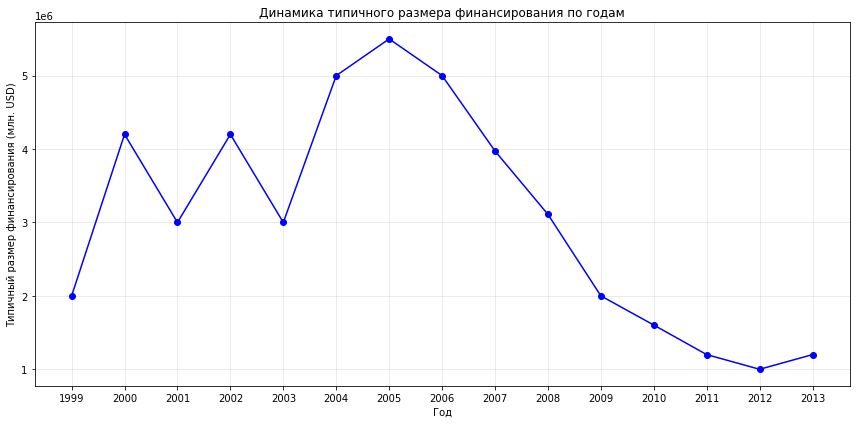

In [36]:
# создаем график
plt.figure(figsize=(12, 6))
plt.plot(filtered_pivot_raised_amount['funded_at_year'], 
         filtered_pivot_raised_amount['median'], 
         marker='o', color='blue')

plt.xlabel('Год')
plt.ylabel('Типичный размер финансирования (млн. USD)')
plt.title('Динамика типичного размера финансирования по годам')
plt.xticks(filtered_pivot_raised_amount['funded_at_year'], rotation=0)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

Построим график, на котором одновременно будут отражаться количество раундов и типовой размер инвестирования за одни раунд.

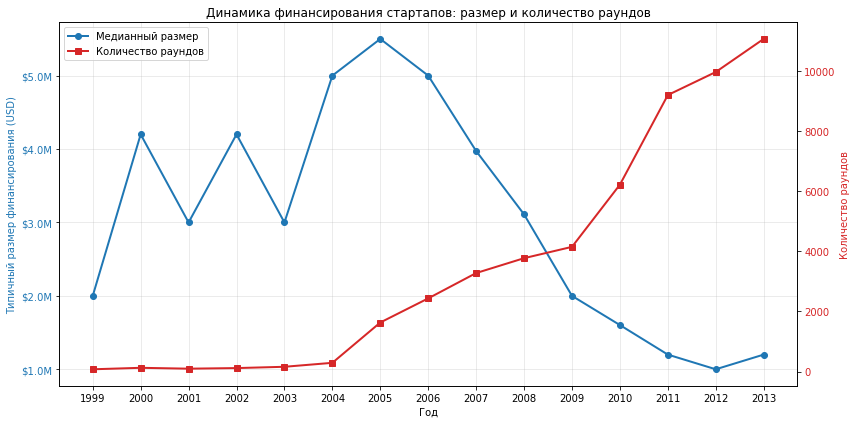

<Figure size 432x288 with 0 Axes>

In [37]:
# Строим график с двумя осями Y
fig, ax1 = plt.subplots(figsize=(12, 6))

# Первая линия - типичный размер
color1 = 'tab:blue'
ax1.set_xlabel('Год')
ax1.set_ylabel('Типичный размер финансирования (USD)', color=color1)
ax1.plot(filtered_pivot_raised_amount['funded_at_year'], 
         filtered_pivot_raised_amount['median'], 
         marker='o', linewidth=2, markersize=6, 
         color=color1, label='Медианный размер')

ax1.tick_params(axis='y', labelcolor=color1)
ax1.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'${x/1000000:.1f}M'))

# Вторая ось Y для количества раундов
ax2 = ax1.twinx()
color2 = 'tab:red'
ax2.set_ylabel('Количество раундов', color=color2)
ax2.plot(filtered_pivot_raised_amount['funded_at_year'], 
         filtered_pivot_raised_amount['count'], 
         marker='s', linewidth=2, 
         markersize=6, color=color2, 
         label='Количество раундов')

ax2.tick_params(axis='y', labelcolor=color2)

plt.title('Динамика финансирования стартапов: размер и количество раундов')
ax1.grid(True, alpha=0.3)
plt.xticks(filtered_pivot_raised_amount['funded_at_year'], rotation=45)

# Добавляем легенду
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper left')

plt.tight_layout()
plt.show()
plt.tight_layout()
plt.show()

-----------
**Выводы:**


В 2005 году типичный размер собранных в рамках одного раунда финансирования средств был максимален (5.5 млн USD).

В 2013 году наблюдался рост размера собранных в рамках одного раунда финансирования средств (с 1 млн USD в 2012 году до 1.2 млн USD), при этом количество раундов также увеличилось (с 9970 в 2012 году до 11072).

------


### Люди и их образование

Заказчик хочет понять, зависит ли полнота сведений о сотрудниках (например, об их образовании) от размера компаний.

- Оцените, насколько информация об образовании сотрудников полна. Используя датасеты `people.csv` и `education.csv`, разделите все компании на несколько групп по количеству сотрудников и оцените среднюю долю сотрудников без информации об образовании в каждой из групп. Обоснуйте выбранные границы групп.
- Оцените, возможно ли для выполнения задания присоединить к этим таблицам ещё и таблицу `degrees.csv`.
-----------

Датафрейм df_people (информация об сотрудниках) содержит 226 709 сторок. При этом информация о компании заполнена только в 34 615 строках.
Проверим датафрейм на наличие пропусков и явных и неявных дубликатов.

In [38]:
# Исследуем датафрейм df_people
missing_percentage_df_people = round(df_people.isna().sum() / len(df_people) * 100,2) 
missing_df_people = pd.DataFrame({
    'Количество пропусков': df_people.isna().sum(),
    'Процент пропусков (%)': missing_percentage_df_people
})
print("\nАнализ пропущенных значений в датафрейме df_people :")
display(missing_df_people)


Анализ пропущенных значений в датафрейме df_people :


,Количество пропусков,Процент пропусков (%)
id,0,0.00
first_name,5,0.00
last_name,1,0.00
company_id,192094,84.73
network_username,187842,82.86


Количество пропусков в столбце, содержащим данные о компании, соствляет 85%. Это значение является высоким, в связи с чем к полученным результатам исследования следует отнестись критически. 

In [39]:
# Проверяем полные дубликаты в датафрейме df_people
df_people.duplicated().sum()

0

In [40]:
# Посчитаем количество неявных дубликатов в датафрейме df_people
df_people.duplicated(subset=['id','company_id'], keep='first').sum()

0

Датафрейм df_education (информация об образовании) содержит 109 610 строк. При этом информация о названии учебного заведения заполнена только в 109 555 строках, а информация об окончании заполнена только в 58 054 строках.
Проверим датафрейм пропуски и на наличие явных и неявных дубликатов (так как для решения задачи нам нужно определить, есть ли образование или нет (бинарный признак), а у сотрудника может быть несколько образований).

In [41]:
# Исследуем датафрейм df_education
missing_percentage_df_education = round(df_education.isna().sum() / len(df_education) * 100,2) 
missing_df_education = pd.DataFrame({
    'Количество пропусков': df_education.isna().sum(),
    'Процент пропусков (%)': missing_percentage_df_education
})
print("\nАнализ пропущенных значений в датафрейме df_education :")
display(missing_df_education)


Анализ пропущенных значений в датафрейме df_education :


,Количество пропусков,Процент пропусков (%)
id,0,0.00
person_id,0,0.00
instituition,55,0.05
graduated_at,51556,47.04


Самое большое количество пропусков в столбце graduated_at (дата окончания учебного заведения), при этом значения в столбце instituition заполнены практически в 100% случаев. Вероятно, сотрудники не всегда указывают дату окончания заведения по различным причинам.

In [42]:
# Проверяем полные дубликаты в датафрейме df_education
df_education.duplicated().sum()

0

In [43]:
# Посчитаем количество неявных дубликатов в датафрейме df_info
df_education.duplicated(['person_id'], keep='first').sum()

41159

In [44]:
# Удалим неявные дубликаты
df_education = df_education.drop_duplicates(['person_id'], keep='first')
df_education.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 68451 entries, 0 to 109608
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            68451 non-null  int64 
 1   person_id     68451 non-null  int64 
 2   instituition  68410 non-null  object
 3   graduated_at  36642 non-null  object
dtypes: int64(2), object(2)
memory usage: 2.6+ MB


In [45]:
# проверим датафрейм построчно на наличие одновременно пустых значений 
# в столбцах об учебном заведениии и дате окончания 
df_education_result = df_education[df_education.isnull().sum(axis=1) ==2]
display(df_education_result)

,id,person_id,instituition,graduated_at
0,1,6117,NaN,NaN
160,161,7304,NaN,NaN
162,163,7306,NaN,NaN
271,272,7724,NaN,NaN
330,331,7914,NaN,NaN
603,604,9742,NaN,NaN
4424,4423,42511,NaN,NaN
19198,19193,132950,NaN,NaN
23269,23265,160570,NaN,NaN
30780,30778,64691,NaN,NaN


Выявдлено всего 14 строк. Их можно удалить, так как это не скажется на результатах исследования в целом.

In [46]:
# Выведем индексы строк в список
indices_list = df_education_result.index.tolist()
print(indices_list)

[0, 160, 162, 271, 330, 603, 4424, 19198, 23269, 30780, 30967, 31386, 34572, 38966]


In [47]:
# Удалим строки по индексам в исходном датафрейме
df_education.drop(indices_list, inplace=True)

**Объединим датафреймы df_people и df_education**. 

Для ответа на поставленый вопрос нам потреуется только часть информации из датафреймов: "id" и "personal_id" (столбец с первичным ключом к данным сотрудников), "company_id". Заполненный столбец personal_id означает, что у стотрудника по признаку заполненности обоих или одного из столбцов "instituition", "graduated_at" означает, что статус образования есть.

In [48]:
# Объединим датафреймы df_people и df_education
df_company_employees = pd.merge(
    df_people[['id', 'company_id']],
    df_education[['person_id']],
    left_on='id',
    right_on='person_id',
    how='left'
)
df_company_employees.info()
display(df_company_employees.sample(5))

<class 'pandas.core.frame.DataFrame'>
Int64Index: 226709 entries, 0 to 226708
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   id          226709 non-null  int64  
 1   company_id  34615 non-null   Int64  
 2   person_id   68057 non-null   float64
dtypes: Int64(1), float64(1), int64(1)
memory usage: 7.1 MB


,id,company_id,person_id
39594,150211,<NA>,NaN
82093,194844,<NA>,194844.0
161230,31863,<NA>,NaN
218937,90347,<NA>,NaN
193701,64242,52730,NaN


In [49]:
# Проведем группировку по компаниям
result = df_company_employees.groupby('company_id').agg({
    'id': 'count',          # количество всех сотрудников
    'person_id': 'count',   # количество сотрудников с образованием
}).reset_index().sort_values(by = 'id', ascending=False)

In [50]:
# Добавим в датафрейм столбец, показываюший соотношение сотрудников, имеющих образование и не имеющих.
result['share']=(1-result['person_id']/result['id']).round(2)

In [51]:
result.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22922 entries, 48 to 11461
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   company_id  22922 non-null  int64  
 1   id          22922 non-null  int64  
 2   person_id   22922 non-null  int64  
 3   share       22922 non-null  float64
dtypes: float64(1), int64(3)
memory usage: 895.4 KB


In [52]:
# Посмотрим статистические показатели датафрейми
result.describe()

,company_id,id,person_id,share
count,22922.000000,22922.000000,22922.000000,22922.000000
mean,102688.472646,1.510121,0.805296,0.466038
std,84842.926930,2.764321,2.004467,0.475019
min,1.000000,1.000000,0.000000,0.000000
25%,28844.500000,1.000000,0.000000,0.000000
50%,70878.500000,1.000000,1.000000,0.330000
75%,174083.500000,1.000000,1.000000,1.000000
max,286091.000000,244.000000,168.000000,1.000000


Проанализируем столбец id. Данные характеризуются небольшим размахом: медиана и среднее близки по значеним, стандартное отклонение также небольшое. 75% данных содержат значение 1 сотрудник. Можно предположить, что в подавляющем большинстве стартапов единственным сотрудником является его учредитель. 
Построим график boxplot для оценки распределения значений и выбросов в данных. Отфтльтруем датафрейм, оставм значения, превышающие "1", чтобы посмотреть детализацию по остальным данным.

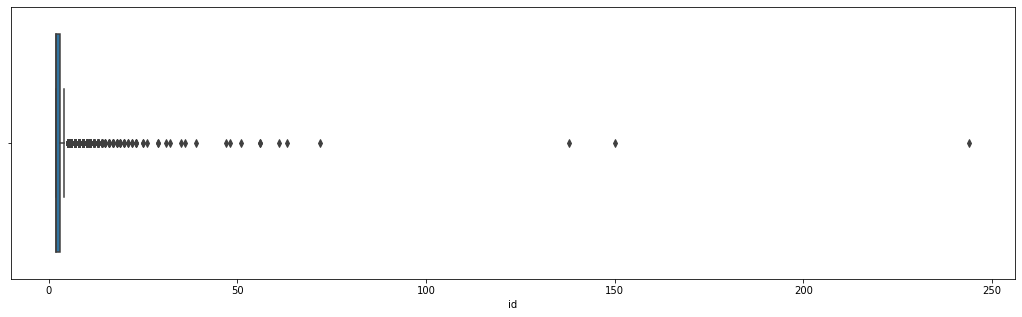

In [53]:
# Создадим график boxplot
plt.figure(figsize=(18, 5))
sns.boxplot(
    data=result[(result['id']>1)],
    x='id')
    
plt.show()

Проведем категоризацию компаний, исходя из распределения данных. Согласно графику, наблюдаемый максимум находится в пределах 4 сотрудников. Так как подавляющее большинство компаний имеют 1 сотрдуника, выделим этот параметр в отдельную категорию. Далее добавим категории по 2, 3, 4 сотрудника (вероятно, также может быть связано с количеством основателей). Стартапы, где сотрудников больше 5 (что совпадает с выбросами в даных), выделим в отдельную категорию.

In [54]:
# Функция для категоризации
def categorize_company(score):
    if score['id']>5:
        return '5 и больше'
    elif score['id'] == 4:
        return '4 сотрудника'
    elif score['id'] == 3:
        return '3 сотрудника'
    elif score['id'] == 2:
        return '2 сотрудника'
    else:
        return '1 сотрудник'

# Применение функции к данным
result['categorize_company_category'] = result.apply(categorize_company, axis=1)

In [55]:
# Посмотрим распределение данных среди групп сотрудников
df_final=result.groupby('categorize_company_category').agg({
    'company_id': 'count',
    'id': 'sum',          # количество всех id (включая повторяющиеся)
    'person_id': 'sum',   # количество всех person_id (включая повторяющиеся)
    'share' : 'mean'
}).reset_index().sort_values(by = 'categorize_company_category', ascending=True)

display(df_final)

,categorize_company_category,company_id,id,person_id,share
0,1 сотрудник,18354,19302,10303,0.463409
1,2 сотрудника,2709,5418,2892,0.466224
2,3 сотрудника,921,2763,1417,0.487090
3,4 сотрудника,450,1800,927,0.485000
4,5 и больше,488,5332,2920,0.506701


Средняя доля сотрудников без информации об образовании в каждой из групп примерно одинаковая (46-50%).

Для объединения данных таблицы degrees.csv (информация о типе образования сотрудника) с другими, содержащими информацию о работнаках, возможно использовать столбец "object_id" (идентификатор сотрудника), предварительно удалив префикс "d:".

-----
**Выводы:**

- Количество пропусков в данных, содержащих информацию о компании, соствляет 85%. Это значение является высоким, в связи с чем к полученным результатам исследования следует отнестись критически. 
- Данные о количестве сотрудниках, для которых указана информация о компании, характеризуются небольшим размахом: медиана и среднее близки по значеним, стандартное отклонение также небольшое. 75% данных содержат значение 1 сотрудник. Можно предположить, что в подавляющем большинстве стартапов единственным сотрудником является его учредитель. 
- Согласно графику boxplot, наблюдаемый максимум находится в пределах 4 сотрудников. Так как подавляющее большинство компаний имеют 1 сотрдуника, выделим этот параметр в отдельную категорию. Далее добавим категории по 2, 3, 4 сотрудника (вероятно, также может быть связано с количеством основателей). Стартапы, где сотрудников больше 5 (что совпадает с выбросами в даннх), выделим в отделбную категорию.
- Средняя доля сотрудников без информации об образовании в каждой из групп примерно одинаковая (46-50%).
- Для объединения данных таблицы degrees.csv (информация о типе образования сотрудника) с другими, содержащими информацию о работнаках, возможно использовать столбец "object_id" (идентификатор сотрудника), предварительно удалив префикс "d:".

------

### Объединять или не объединять — вот в чём вопрос

Некоторые названия столбцов встречаются в датасетах чаще других. В результате предварительной проверки датасетов было выяснено, что столбец `company_id` подходит для объединения данных.

- Установите, подходит ли для объединения данных столбец `network_username`, который встречается в нескольких датасетах. Нам необходимо понимать, дублируется ли для разных датасетов информация в столбцах с таким названием, и если да — то насколько часто.


Столбец "network_username" содержится в датафреймах df_company_and_rounds и df_people. Посмотрим какое количество уникальных знаечений содержится в столбцах company_id в каждом датафреймеэ

In [56]:
# Посчитаем количество уникальных значений в столбце company_id в датафрейме df_company_and_rounds
unique_company_id_1 = df_company_and_rounds['company_id'].nunique()
print('Количество уникальных значений в датафрейме df_company_and_rounds:')
print(unique_company_id_1)

Количество уникальных значений в датафрейме df_company_and_rounds:
31939


In [57]:
# Посчитаем количество уникальных значений в столбце company_id в датафрейме df_people
unique_company_id_2 = df_people['company_id'].nunique()
print('Количество уникальных значений в датафрейме df_people:')
print(unique_company_id_2)

Количество уникальных значений в датафрейме df_people:
22922


Для оценки совпадений значений столбцах network_username в обоих датасетах воспользуемся свойсством множества и найдем пересечения, посчитаем количество совпаадающих значений.

In [58]:
# Создадим один кортеж из всех значений столбца network_username в датафрейме df_company_and_rounds
all_network_usernames_company = set(df_company_and_rounds['network_username'])

# Создадим один кортеж из всех значений столбца network_username в датафрейме df_people
all_network_usernames_people = set(df_people['network_username'])

# Найдем пересечение
common_network_usernames = all_network_usernames_company.intersection(all_network_usernames_people)

# Посчитаем количество совпадающих значений
count_matches = len(common_network_usernames)

print(f"Количество совпадающих network_username: {count_matches}")


Количество совпадающих network_username: 2200


-----
**Выводы:**

Количество уникальных значений в столбце company_id более чем в 10 раз превосходит количество совпадающих значений в столбцах network_username. При таком низком пороге использовать столбцы с именем `network_username` для объединения данных невозможно.
Кроме того, исходя из визуального анализа строк, значения network_username в датафрейме df_company_and_rounds формируется из названия компании, а в датафрейме df_people формируется из имени и фамилии. Возможно, наличие совпадающих значений обусловлено наименованием компании в честь сотрудника (скорее всего, основателя стартапа).

------



### Проблемный датасет и причина возникновения пропусков

Во время собственного анализа данных у заказчика больше всего вопросов возникло к датасету `company_and_rounds.csv`. В нём много пропусков как раз в информации о раундах, которая заказчику важна.


- Любым удобным способом приведите данные в вид, который позволит в дальнейшем проводить анализ в разрезе отдельных компаний. Обратите внимание на структуру датасета, порядок и названия столбцов, проанализируйте значения.


По гипотезе заказчика данные по компаниям из этой таблицы раньше хранились иначе, более удобным для исследования образом.

- Максимальным образом сохраняя данные, сохранив их связность и исключив возможные возникающие при этом ошибки, подготовьте данные так, чтобы удобно было отобрать компании по параметрам и рассчитать показатели из расчёта на одну компанию без промежуточных агрегаций.



------------

Ранее было отмечено, что датафрейм содержит дублирущие названия столбцов company_id, а также дублирующее описание для разных столбцов:  сумма финансирования (funding total и raised_amount). 

Описание столбца founded at указано не вполне точно: с высокой вероятностью это дата основания компании. Кроме того, пока не до конца очевидным остается различие в столбцах "investment rounds" (число инвестиционных раундов) и "funding rounds" (число финансовых раундов). 

Одинаковое количество пропусков (75%) в столбцах 13-21 позволяет слелать предположение, что датасет был получен путем объединения 2х таблиц, одна из которых содержала общие данные о компаниях, вторая - об их финансировании. 

**Разделим датасет на 2: один будет содержать общие сведения о компаниях, а второй об этапах финансирования.**

In [59]:
# список нужных столбцов для датафрейма о компаниямх
columns_for_first = ['company_ID', 'name', 'category_code', 'status', 
                     'founded_at', 'closed_at', 'domain', 'network_username', 
                     'country_code', 'investment_rounds', 'funding_rounds', 
                     'funding_total', 'milestones']
# Остальные столбцы — для второго об этапах финансирования
columns_for_second = [col for col in df_company_and_rounds.columns if col not in columns_for_first]

# Создаем два датафрейма
df_company = df_company_and_rounds[columns_for_first]
df_funding_round = df_company_and_rounds[columns_for_second]


In [60]:
# Выведем несколько строк для ознакомления
display(df_company.head(7))

,company_ID,name,category_code,status,founded_at,closed_at,domain,network_username,country_code,investment_rounds,funding_rounds,funding_total,milestones
0,1,Wetpaint,web,operating,2005-10-17,NaT,wetpaint-inc.com,BachelrWetpaint,USA,0,3,39750000,5
1,1,Wetpaint,web,operating,2005-10-17,NaT,wetpaint-inc.com,BachelrWetpaint,USA,0,3,39750000,5
2,1,Wetpaint,web,operating,2005-10-17,NaT,wetpaint-inc.com,BachelrWetpaint,USA,0,3,39750000,5
3,10,Flektor,games_video,acquired,NaT,NaT,flektor.com,NaN,USA,0,0,0,0
4,100,There,games_video,acquired,NaT,NaT,there.com,NaN,USA,0,0,0,4
5,10000,MYWEBBO,network_hosting,operating,2008-07-26,NaT,mywebbo.com,NaN,NaN,0,0,0,0
6,10001,THE Movie Streamer,games_video,operating,2008-07-26,NaT,themoviestreamer.com,NaN,NaN,0,0,0,0


In [61]:
# Переименуем столбец 'company_ID'в'company_id'
df_company=df_company.rename(columns={'company_ID':'company_id'})

In [62]:
# Исследуем датафрейм df_company
missing_percentage_df_company = round(df_company.isna().sum() / len(df_company) * 100,2) 
missing_df_company = pd.DataFrame({
    'Количество пропусков': df_company.isna().sum(),
    'Процент пропусков (%)': missing_percentage_df_company
})
print("\nАнализ пропущенных значений в датафрейме df_company_and_rounds :")
display(missing_df_company)


Анализ пропущенных значений в датафрейме df_company_and_rounds :


,Количество пропусков,Процент пропусков (%)
company_id,302,0.14
name,302,0.14
category_code,73888,33.93
status,302,0.14
founded_at,107818,49.51
closed_at,214325,98.42
domain,70615,32.43
network_username,122240,56.13
country_code,109167,50.13
investment_rounds,302,0.14


In [63]:
# Проверяем полные дубликаты в датафрейме df_company
df_company.duplicated().sum()

21220

In [64]:
# Удалим явные дубликаты
df_company = df_company.drop_duplicates(keep='first')

In [65]:
df_company.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 196554 entries, 0 to 217472
Data columns (total 13 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   company_id         196553 non-null  Int64         
 1   name               196553 non-null  object        
 2   category_code      123186 non-null  object        
 3   status             196553 non-null  object        
 4   founded_at         91227 non-null   datetime64[ns]
 5   closed_at          2620 non-null    datetime64[ns]
 6   domain             126545 non-null  object        
 7   network_username   80591 non-null   object        
 8   country_code       87990 non-null   object        
 9   investment_rounds  196553 non-null  Int64         
 10  funding_rounds     196553 non-null  Int64         
 11  funding_total      196553 non-null  Int64         
 12  milestones         196553 non-null  Int64         
dtypes: Int64(5), datetime64[ns](2), object(6)
me

Значительно сократилось количество непустых значений в столбце closed_at, следовательно, были удалены данные о компаниях, которые, прекратили деятельность и, возможно, не получили финансирование.

In [66]:
# Проверим датафрейм построчно на наличие  пустых строк
# в столбцах об учебном заведениии и дате окончания 
df_company_result = df_company[df_company.isnull().sum(axis=1) ==13]
display(df_company_result)

,company_id,name,category_code,status,founded_at,closed_at,domain,network_username,country_code,investment_rounds,funding_rounds,funding_total,milestones
217472,<NA>,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,<NA>,<NA>,<NA>,<NA>


In [67]:
# Удалим строку по индексам в исходном датафрейме
df_company = df_company.drop(index=217472)

In [68]:
# Посчитаем количество уникальных значений в столбцах company_id и name в датафрейме df_company
unique_id = df_company['company_id'].nunique()
print(unique_id)

unique_name = df_company['name'].nunique()
print(unique_name)

196553
196506


По итогу обработки данных количество уникальных наименований в столбце name меньше на 46, чем в столбце company_id. Следовательно в данных остались неявные дубликаты.

In [69]:
# Подсчетаем количества каждого уникального имени
name_counts = df_company['name'].value_counts()

# Подсчитаем общее количество повторений по наименованию компаний
print("Количество наименования, встречающиеся более одного раза:")
print(name_counts[name_counts > 1].sum())

# Выберем наименования только тех, которые встречаются более одного раза
names_multiple_times = name_counts[name_counts > 1].index.tolist()

print("Наименования, встречающиеся более одного раза:")
print(names_multiple_times)

Количество наименования, встречающиеся более одного раза:
93
Наименования, встречающиеся более одного раза:
['BBOescape', 'Sapce Adventures Ltd.', 'IDB Holdings', 'Insight', 'Arizona Commerce Authority', 'Wharton School,', 'Hot Topic Media Inc.', 'Tip or Sip', 'ISG Resources', "Gunn's Home Interiors", 'Design Source Furniture', 'Grove', 'Tech Field Day', 'Empowered Careers', 'Gestalt IT', 'Desigual', 'FlightHike', 'International Space Consultants', 'FLEX by fenwick', 'ApneaDX', 'Data Transport Systems', 'Marbrerie des Yvelines', 'aquatic inf', 'net-linx', 'Buzz My Videos', "l'Européene de Banque", 'clutterfi', 'Olnick Organization', 'Canal do Crédito', 'Brown and Brown', 'EVIGO', 'Bionic', 'Making Studios', 'National Institute of Physics', 'IDB Group', 'Megatube', 'Walmoo', 'Live Picture', 'Trend Offset Printing', 'Canadian Institute for Advanced Research', 'Apex Partners Isarel', 'Gm Products', 'Movenpick Group', 'Stradling Yocca Carlson & Rauth', 'SIMTEAM', 'International Space Unive

Рассмотрим неявные дубликаты на примере одной из компаний из списка.

In [70]:
# Выберем строку, где 'name' равно 'Arizona Commerce Authority'
result = df_company[df_company['name'] == 'Arizona Commerce Authority']

display(result)

,company_id,name,category_code,status,founded_at,closed_at,domain,network_username,country_code,investment_rounds,funding_rounds,funding_total,milestones
137955,272115,Arizona Commerce Authority,NaN,operating,NaT,NaT,NaN,NaN,NaN,0,0,0,0
137956,272116,Arizona Commerce Authority,NaN,operating,NaT,NaT,NaN,NaN,NaN,1,0,0,0


Значения строк практически совпадают, однако есть расхождения в одном столбце. Для того, чтобы не потерять информацию, учитывая, что доля неявных дубликатов незначительная, оставим эти значения как есть.

---------

In [71]:
# Создадим датафрейм, содержащий информацию об этапах финансирования
display(df_funding_round.head(7))

,funding_round_id,company_id,funded_at,funding_round_type,raised_amount,pre_money_valuation,participants,is_first_round,is_last_round,funded_at_year
0,888,1,2005-10-01,series-a,5250000,0,2,0,1,2005
1,889,1,2007-01-01,series-b,9500000,0,3,0,0,2007
2,2312,1,2008-05-19,series-c+,25000000,0,4,1,0,2008
3,<NA>,<NA>,NaT,NaN,<NA>,<NA>,<NA>,<NA>,<NA>,NaT
4,<NA>,<NA>,NaT,NaN,<NA>,<NA>,<NA>,<NA>,<NA>,NaT
5,<NA>,<NA>,NaT,NaN,<NA>,<NA>,<NA>,<NA>,<NA>,NaT
6,<NA>,<NA>,NaT,NaN,<NA>,<NA>,<NA>,<NA>,<NA>,NaT


In [72]:
# Исследуем датафрейм df_funding_round
missing_percentage_df_funding_round = round(df_funding_round.isna().sum() / len(df_funding_round) * 100,2) 
missing_df_funding_round = pd.DataFrame({
    'Количество пропусков': df_funding_round.isna().sum(),
    'Процент пропусков (%)': missing_percentage_df_funding_round
})
print("\nАнализ пропущенных значений в датафрейме df_funding_round :")
display(missing_df_funding_round)


Анализ пропущенных значений в датафрейме df_funding_round :


,Количество пропусков,Процент пропусков (%)
funding_round_id,164846,75.70
company_id,164846,75.70
funded_at,165094,75.81
funding_round_type,164846,75.70
raised_amount,164846,75.70
pre_money_valuation,164846,75.70
participants,164846,75.70
is_first_round,164846,75.70
is_last_round,164846,75.70
funded_at_year,165094,75.81


В каждом столбце датафрейма содержится 75% пропусков. Пропуски обусловлены тем, что исходный датасет был составлени из 2х таблиц, однако количество компаний, получивших финансирование значительно меньше общего числа стартапов.

In [73]:
# Проверяем полные дубликаты в датафрейме df_funding_round
df_funding_round.duplicated().sum()

164845

In [74]:
# Удалим полные дубликаты
df_funding_round=df_funding_round.drop_duplicates(keep='first')

In [75]:
# проверим датафрейм построчно на наличие  пустых строк
# в столбцах об учебном заведениии и дате окончания 
df_funding_round_result = df_funding_round[df_funding_round.isnull().sum(axis=1) ==9]
display(df_funding_round_result)

,funding_round_id,company_id,funded_at,funding_round_type,raised_amount,pre_money_valuation,participants,is_first_round,is_last_round,funded_at_year


Пустые строки отсутствуют.

In [76]:
# Выведем информацию о датафрейме
df_funding_round.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 52929 entries, 0 to 217773
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   funding_round_id     52928 non-null  Int64         
 1   company_id           52928 non-null  Int64         
 2   funded_at            52680 non-null  datetime64[ns]
 3   funding_round_type   52928 non-null  object        
 4   raised_amount        52928 non-null  Int64         
 5   pre_money_valuation  52928 non-null  Int64         
 6   participants         52928 non-null  Int64         
 7   is_first_round       52928 non-null  Int64         
 8   is_last_round        52928 non-null  Int64         
 9   funded_at_year       52680 non-null  period[A-DEC] 
dtypes: Int64(7), datetime64[ns](1), object(1), period[A-DEC](1)
memory usage: 4.8+ MB


Данные датафрейма после обработки являются полными.

----

**Выводы:**

Была выдвинута гипотеза, что что датасет был получен путем объединения 2х таблиц, одна из которых содержала общие данные о компаниях, вторая - об их финансировании. 
Данные датасета были разделены на 2: один содержит общие сведения о компаниях (df_company), а второй об этапах финансирования (df_funding_round).

Данные новых датафреймов предобработаны (удалены дублирующие значения, пустые строки).

----


## Шаг 3. Исследовательский анализ объединённых таблиц



### Объединение данных

Объедините данные для ответа на вопросы заказчика, которые касаются интересующих его компаний. Заказчика прежде всего интересуют те компании, которые меняли или готовы менять владельцев. Получение инвестиций или финансирования, по мнению заказчика, означает интерес к покупке или продаже компании.

В качестве основы для объединённой таблицы возьмите данные из обработанного датасета `company_and_rounds.csv` — выберите только те компании, у которых указаны значения `funding_rounds` или `investment_rounds` больше нуля, или те, у которых в колонке `status` указано `acquired`. В результирующей таблице должно получиться порядка 40 тысяч компаний.

Проверьте полноту и корректность получившейся таблицы. Далее работайте только с этими данными.

---------

Проведем фильтрацию датафрейма df_company по указанным параметрам.

In [77]:
# Создадим новый датафрейм
df_company_filtred=df_company[(df_company['funding_rounds']>0) | 
                              (df_company['investment_rounds']>0) | 
                              (df_company['status']=='acquired')]

In [78]:
# Выведем информацию о датафрейме
df_company_filtred.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40747 entries, 0 to 217469
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   company_id         40747 non-null  Int64         
 1   name               40747 non-null  object        
 2   category_code      35315 non-null  object        
 3   status             40747 non-null  object        
 4   founded_at         27807 non-null  datetime64[ns]
 5   closed_at          2128 non-null   datetime64[ns]
 6   domain             35754 non-null  object        
 7   network_username   20850 non-null  object        
 8   country_code       34742 non-null  object        
 9   investment_rounds  40747 non-null  Int64         
 10  funding_rounds     40747 non-null  Int64         
 11  funding_total      40747 non-null  Int64         
 12  milestones         40747 non-null  Int64         
dtypes: Int64(5), datetime64[ns](2), object(6)
memory usage: 4.5+

Новый датафрем содержит 40 747 сток и 13 столбцов и отражает данные только о компаниях, которые получали инвестиции или финансирование. Соответствующие столбцы (funding_rounds, investment_rounds, status ) не содержат пропусков.


### Анализ выбросов

Заказчика интересует обычный для рассматриваемого периода размер средств, который предоставлялся компаниям.

- По предобработанному столбцу `funding_total` графическим способом оцените, какой размер общего финансирования для одной компании будет типичным, а какой — выбивающимся.
- В процессе расчёта значений обратите внимание, например, на показатели, возвращаемые методом `.describe()`, — объясните их. Применимы ли к таким данным обычные способы нахождения типичных значений?

-------------------

Для оценки типичных и выбивающихся значений объема финансирования на одну компанию построим графики boxplot. В одном случае график будет учитывать все значения, во втором уберем выбросы.

In [79]:
# Отфильтруем график, оставив значение в столбце funding_total суммы, больше 0
df_company_funding_total=df_company_filtred[df_company_filtred['funding_total']>0]

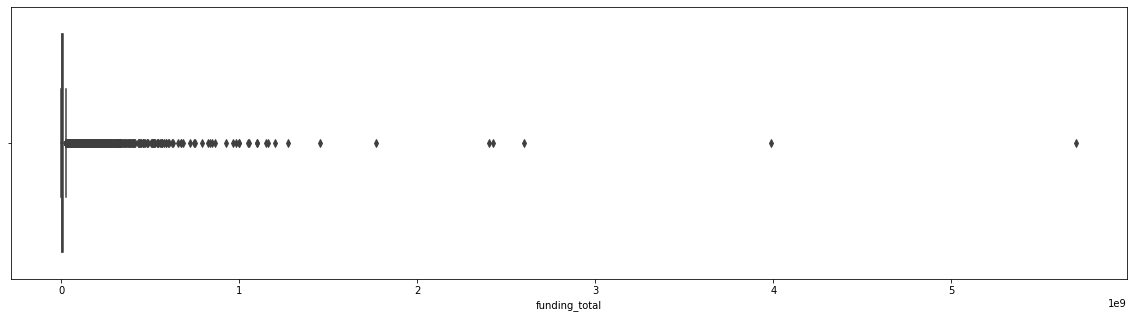

In [80]:
# Создадим график boxplot, показывающий выбросы
plt.figure(figsize=(20, 5))
sns.boxplot(
    data=df_company_funding_total,
    x='funding_total')
    
plt.show()

Из графика следует, что большинство стартапов имеют малые суммы финансирования, крупные проекты встречаются реже, что создает выбросы. Значения, выходящие за пределы "правого уса" имеют большой разброс.

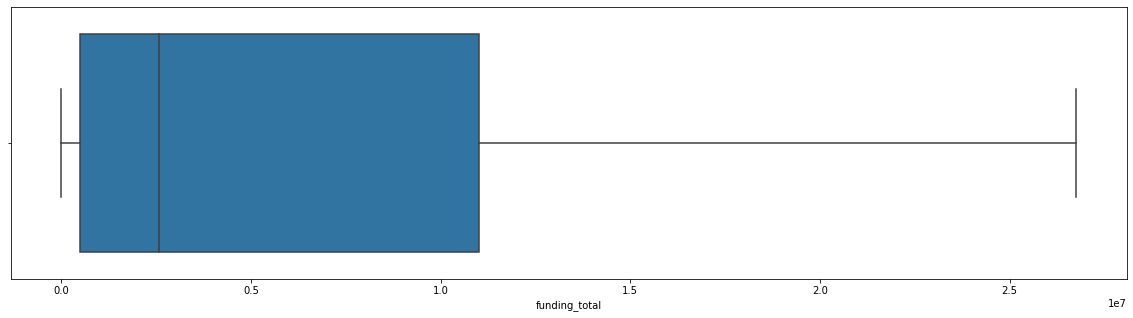

In [81]:
# Создадим график boxplot без выбросов
plt.figure(figsize=(20, 5))
sns.boxplot(
    data=df_company_funding_total, showfliers=False,
    x='funding_total')
    
plt.show()

Распределение данных показывает, что значения распределены ассиметрично со смещением влево. Это подтверждает вывод, что большая часть стартапов имеет меньший размер финансирования. Медиана приблизительно равна 2,5 млн USD и также смещена влево. Наблюдаемый максимум значенией финансирования составляет примерно 23 млн USD.

Используем метод describe для получения более точных данных.

In [82]:
# Применим метод describe
df_company_funding_total['funding_total'].describe()

count    2.787400e+04
mean     1.481652e+07
std      6.775936e+07
min      2.910000e+02
25%      5.000000e+05
50%      2.564500e+06
75%      1.100000e+07
max      5.700000e+09
Name: funding_total, dtype: float64

Статистические показатели рассчитывались для 27 874 компаний. Среднее значение финансирования равно почти 15 млн USD, в то время как медианное значение - 2,56 млн USD. Стандартное отклонение составляет почти 67,8 млн USD. Таким образом, данные имеют большой разброс.
Метод describe отлично подходит для нахождения типичных значений описательной статистики и подтвердил выводы, сделанные по итогам графичиского анализа.


### Куплены забесплатно?

- Исследуйте компании, которые были проданы за ноль или за один доллар, и при этом известно, что у них был ненулевой общий объём финансирования.

- Рассчитайте аналитически верхнюю и нижнюю границу выбросов для столбца `funding_total` и укажите, каким процентилям границы соответствуют.

------

Для ответа на поставленные вопросы нам необходимо объединить датафрейм df_company и df_acquisition (содержит информацию о сделках с компаниями). Далее проведем фильтрацию, оставим только значения, где сумма сделки равна 0 или 1, а размер финансировани не равен 0.

In [83]:
# Объединяем датафреймы по ключам
df_company_acquired = pd.merge(
    df_company_filtred,
    df_acquisition[['acquired_company_id', 
                    'price_amount', 'acquired_at', 
                    'acquiring_company_id', 'id']],
    left_on='company_id',
    right_on='acquired_company_id',
    how='left'
)

# Удалим столбец, дублирующий id стартапа
del df_company_acquired['acquired_company_id']
# Проверяем структуру
df_company_acquired.info()
# Выведем несколько строк нового датафрейма
display(df_company_acquired.sample(5))


<class 'pandas.core.frame.DataFrame'>
Int64Index: 40890 entries, 0 to 40889
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   company_id            40890 non-null  Int64         
 1   name                  40890 non-null  object        
 2   category_code         35436 non-null  object        
 3   status                40890 non-null  object        
 4   founded_at            27911 non-null  datetime64[ns]
 5   closed_at             2128 non-null   datetime64[ns]
 6   domain                35883 non-null  object        
 7   network_username      20938 non-null  object        
 8   country_code          34858 non-null  object        
 9   investment_rounds     40890 non-null  Int64         
 10  funding_rounds        40890 non-null  Int64         
 11  funding_total         40890 non-null  Int64         
 12  milestones            40890 non-null  Int64         
 13  price_amount    

,company_id,name,category_code,status,founded_at,closed_at,domain,network_username,country_code,investment_rounds,funding_rounds,funding_total,milestones,price_amount,acquired_at,acquiring_company_id,id
8790,178055,Chekkt,ecommerce,operating,2012-08-10,NaT,chekkt.com,Chekkt,ISR,0,1,1250000,1,NaN,NaT,NaN,NaN
10849,19179,Studyprint,other,acquired,NaT,NaT,studyprint.nl,NaN,NaN,0,0,0,0,NaN,NaT,NaN,NaN
10298,187796,Medmonk,medical,operating,NaT,NaT,medmonk.com,NaN,USA,0,1,0,0,NaN,NaT,NaN,NaN
18562,259628,INTICA Biomedical,biotech,operating,NaT,NaT,inticabio.com,NaN,USA,0,1,640000,0,NaN,NaT,NaN,NaN
18415,258767,Zymenex,biotech,acquired,1998-01-01,NaT,zymenex.com,NaN,DNK,0,0,0,1,0.0,2013-08-26,258766.0,9492.0


In [84]:
# Проведем фильтрацию
df_company_acquired_filtred=df_company_acquired[(df_company_acquired['price_amount'].isin([0, 1])) & 
                              (df_company_acquired['funding_total'] != 0)]

In [85]:
# Проверим дубликаты
df_company_acquired_filtred.duplicated(['company_id'], keep='first').sum()

25

Данные сожержат дубли, установим причины.

In [86]:
# Создадим датафрейм с дубликатами
duplicates = df_company_acquired_filtred[df_company_acquired_filtred.duplicated(['company_id'],keep=False)]

display(duplicates.head(6))

,company_id,name,category_code,status,founded_at,closed_at,domain,network_username,country_code,investment_rounds,funding_rounds,funding_total,milestones,price_amount,acquired_at,acquiring_company_id,id
1237,130,KickApps,enterprise,acquired,2004-03-01,NaT,kickapps.com,KickApps,USA,0,3,39007800,5,0.0,2011-01-31,475.0,5073.0
1238,130,KickApps,enterprise,acquired,2004-03-01,NaT,kickapps.com,KickApps,USA,0,3,39007800,5,0.0,2012-12-12,234881.0,9040.0
1842,139762,Kanbox,enterprise,acquired,NaT,NaT,kanbox.com,NaN,CHN,0,1,20000000,1,0.0,2013-09-25,528.0,9699.0
1843,139762,Kanbox,enterprise,acquired,NaT,NaT,kanbox.com,NaN,CHN,0,1,20000000,1,0.0,2013-09-25,211687.0,9705.0
2977,146544,MoneyReef,mobile,acquired,NaT,NaT,moneyreef.com,NaN,USA,0,1,650000,2,0.0,2012-04-27,46951.0,9711.0
2978,146544,MoneyReef,mobile,acquired,NaT,NaT,moneyreef.com,NaN,USA,0,1,650000,2,0.0,2012-08-01,46951.0,9714.0


Причинами, по которым одна компания оказалась в датасете со сделками несколько раз являются:
- перепродажа компании (или, возможно, продажа части доли, когда компания не была продана сразу целиком);
- участие нескольких покупателей в сделке.

Из имеющихся данных нельзя сделать однозначный вывод о причинах продажи компании за 0 или 1 USD. Можно предположить, что при изначальном финансировании была использована конструкция опциона, когда инвестор получает долю в компании взамен ранее предоставленных инвестиций. Однозначный вовод можно сделать при наличии данных об инвесторе и покупателе.

-----

Рассчитаем аналитически верхнюю и нижнюю границу выбросов для столбца `funding_total` и укажим, каким процентилям границы соответствуют.


In [87]:
# Расчет границ IQR
Q1 = df_company_acquired_filtred['funding_total'].quantile(0.25)
Q3 = df_company_acquired_filtred['funding_total'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(f"IQR: {IQR:,}")
print(f"Нижняя граница (по IQR): {lower_bound}")
print(f"Верхняя граница (по IQR): {upper_bound}")


IQR: 13,500,000.0
Нижняя граница (по IQR): -18250000.0
Верхняя граница (по IQR): 35750000.0


In [88]:
# Рассчитаем процентиль для верхней границы выбросов
count = df_company_acquired_filtred[df_company_acquired_filtred['funding_total']>=35750000]
count_1=count['funding_total'].count()
print (1 - count_1/df_company_acquired_filtred['funding_total'].count())

0.9091470951792336


----
Межквартильный размах IQR составляет 13,5 млн USD. 
Нижняя граница выбросов определена отрицательным, числом, но в наших данных при отсутствии отрицательных значений, следует прийти к выводу, что в данных отсутствуют выбросы по нижней границе.
Верхняя граница равна значению 35,75 млн USD и равна 90,9%.

---


### Цены стартапов по категориям

Категории стартапов с типично высокими ценами покупки стартапов и значительным разбросом цен могут быть привлекательными для крупных инвесторов, которые готовы к высоким рискам ради потенциально больших доходов. Среди категорий стартапов выделите категории стартапов, характеризующиеся:

- типично высокими ценами;
- и наибольшим разбросом цен за стартап.

Объясните, почему решили составить топ именно из такого числа категорий и почему рассчитывали именно так.

-------

Проведем фильтрацию датафрейма, оставим только те строки, где цена сделки была выше 0.

In [89]:
# Проведем фильтрацию
df_company_acquired_filtred_2=df_company_acquired[(df_company_acquired['price_amount'] > 0)]

# Выгрузим информацию о датафрейме
df_company_acquired_filtred_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2473 entries, 1 to 40889
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   company_id            2473 non-null   Int64         
 1   name                  2473 non-null   object        
 2   category_code         1998 non-null   object        
 3   status                2473 non-null   object        
 4   founded_at            1456 non-null   datetime64[ns]
 5   closed_at             12 non-null     datetime64[ns]
 6   domain                1993 non-null   object        
 7   network_username      653 non-null    object        
 8   country_code          1959 non-null   object        
 9   investment_rounds     2473 non-null   Int64         
 10  funding_rounds        2473 non-null   Int64         
 11  funding_total         2473 non-null   Int64         
 12  milestones            2473 non-null   Int64         
 13  price_amount     

Из более чем 9400 компаний у нас осталось только 2473, что составляет порядка 26% компаний, которые были куплены за реальные деньги.

Посмотрим наиболее популярные покупаемые категории стартапов.

In [90]:
# Проведем группировку
grouped_counts = df_company_acquired_filtred_2.groupby('category_code')['company_id'].count().sort_values(ascending=False)
print(grouped_counts)

category_code
software            403
biotech             263
web                 260
mobile              117
enterprise          116
games_video          88
other                84
advertising          84
hardware             78
public_relations     74
semiconductor        71
network_hosting      64
ecommerce            50
cleantech            39
security             36
consulting           32
manufacturing        21
finance              20
search               19
health               10
news                  9
hospitality           7
real_estate           6
education             6
photo_video           5
messaging             5
medical               4
social                4
travel                4
fashion               3
music                 3
analytics             3
automotive            3
transportation        3
sports                2
nanotech              1
local                 1
Name: company_id, dtype: int64


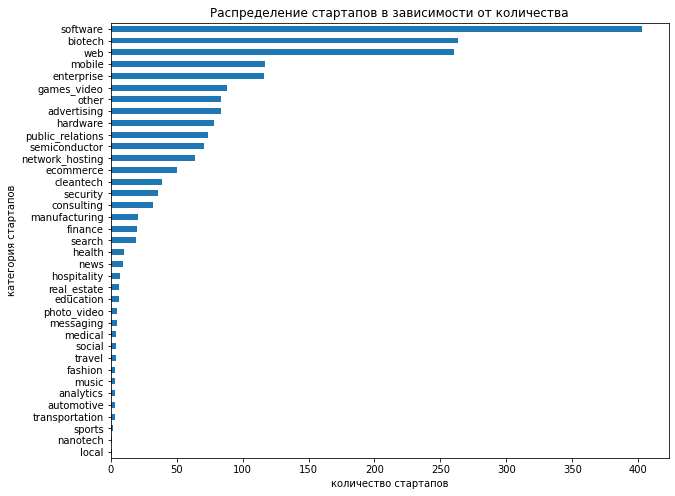

In [91]:
grouped_counts = grouped_counts.iloc[::-1]


# Построим столбчатую диаграмму для визуализации распределения заведений по категориям.

ax=grouped_counts.plot(
               kind='barh', # Тип графика - столбчатая диаграмма
               rot=0, # Градус вращения подписи по оси Х
               legend=False, # Выключаем легенду,
               title=f'Распределение стартапов в зависимости от количества',
               figsize=(10,8)
)
# Убираем сетку
ax.grid(False)

# Настраиваем оформление графика
plt.xlabel('количество стартапов') 
plt.ylabel('категория стартапов')

# Выводим график
plt.show()

Самыми популярными категориями являются те, которые расположились выше 17 строки (manufacturing). Выведем их названия.

In [92]:
# Выведем самые популярные категории
top_16_categories = df_company_acquired_filtred_2.groupby('category_code')['company_id'].count().sort_values(ascending=False).head(16).index.tolist()
print('Топ-16:')
print(top_16_categories )

Топ-16:
['software', 'biotech', 'web', 'mobile', 'enterprise', 'games_video', 'other', 'advertising', 'hardware', 'public_relations', 'semiconductor', 'network_hosting', 'ecommerce', 'cleantech', 'security', 'consulting']


Построим график совместного распределения стартапов по параметрам "типично высокие цены" (возьмем медиану) и "наибольший разброс цен за стартап" (IQR). Предварительно для очистки данных о выбросов уберем значения выше 90%.

90-й процентиль: $797,000,000
Размер до очистки: 2473
Размер после очистки: 2225

Топ-16 категорий:
                       median  count          iqr
category_code                                    
software           40000000.0    363   89580000.0
web                48300000.0    239  135500000.0
biotech           120750000.0    226  307600000.0
mobile             45100000.0    106  105000000.0
enterprise         43300000.0     98  139290000.0
games_video        49500000.0     82  143800000.0
advertising        50000000.0     76  116900000.0
hardware           50000000.0     73  237600000.0
other              50000000.0     72  160475000.0
semiconductor      75000000.0     64  168962500.0
public_relations   40000000.0     63  183000000.0
network_hosting    64115000.0     56  154000000.0
ecommerce         105000000.0     46  303425000.0
cleantech         162500000.0     34  259125000.0
security          148500000.0     31  261000000.0
consulting         28125000.0     30   77700000.0


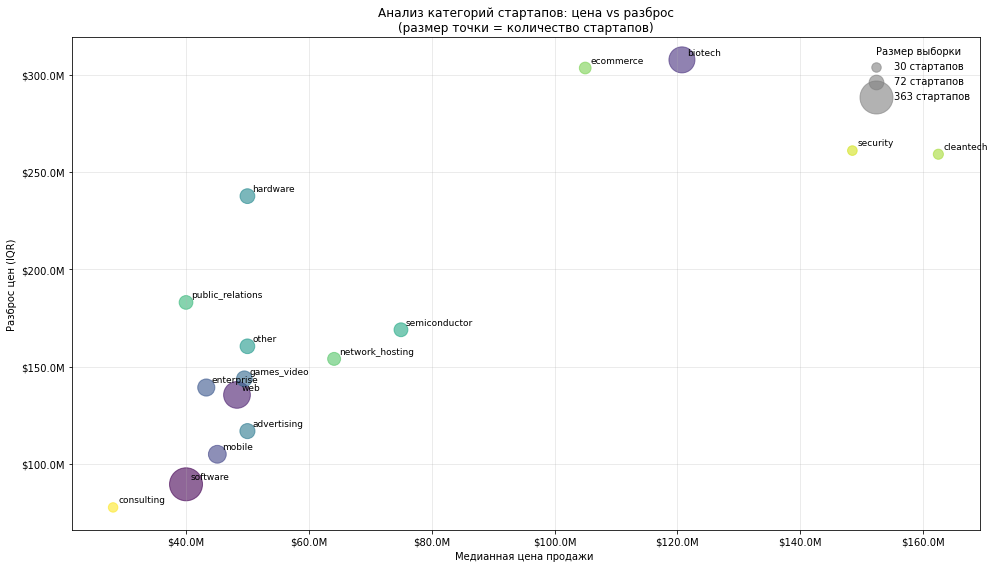


Использован IQR (межквартильный размах) как показатель разброса
Удалено 248 выбросов (>90-й процентиль)


In [93]:
# 1. Убираем выбросы выше 90-го процентиля
price_90th = df_company_acquired_filtred_2['price_amount'].quantile(0.9)
df_cleaned = df_company_acquired_filtred_2[df_company_acquired_filtred_2['price_amount'] <= price_90th]

print(f"90-й процентиль: ${price_90th:,.0f}")
print(f"Размер до очистки: {len(df_company_acquired_filtred_2)}")
print(f"Размер после очистки: {len(df_cleaned)}")

# 2. Группировка по категориям с расчетом статистик
stats = df_cleaned.groupby('category_code')['price_amount'].agg([
    'median',        # типичная цена (вместо mean из-за асимметрии)
    'count',         # количество стартапов
    lambda x: x.quantile(0.75) - x.quantile(0.25)  # IQR как показатель разброса
]).rename(columns={'<lambda_0>': 'iqr'})

# Берем топ-16 категорий по количеству
stats_top = stats.nlargest(16, 'count')

print("\nТоп-16 категорий:")
print(stats_top.head(16))

# 3. Построение scatter plot
plt.figure(figsize=(14, 8))

# Scatter plot
scatter = plt.scatter(
    stats_top['median'], 
    stats_top['iqr'],
    s=stats_top['count'] * 3,  # размер пропорционален количеству
    alpha=0.6,
    c=range(len(stats_top)),  # цвет для различения
    cmap='viridis'
)

# Добавляем названия категорий на точки
for i, (category, row) in enumerate(stats_top.iterrows()):
    plt.annotate(
        category, 
        (row['median'], row['iqr']),
        xytext=(5, 5), 
        textcoords='offset points',
        fontsize=9,
        ha='left'
    )

plt.xlabel('Медианная цена продажи ')
plt.ylabel('Разброс цен (IQR)')
plt.title('Анализ категорий стартапов: цена vs разброс\n(размер точки = количество стартапов)')
plt.grid(True, alpha=0.3)

# Форматирование осей
plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'${x/1e6:.1f}M'))
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'${x/1e6:.1f}M'))

# Легенда для размеров
sizes = [stats_top['count'].min(), stats_top['count'].median(), stats_top['count'].max(), ]
labels = [f'{int(s)} стартапов' for s in sizes]
legend_elements = [plt.scatter([], [], s=s*3, alpha=0.6, color='gray') for s in sizes]
legend1 = plt.legend(legend_elements, labels, loc='upper right', title='Размер выборки', frameon=False)

plt.tight_layout()
plt.show()

# Дополнительная информация
print(f"\nИспользован IQR (межквартильный размах) как показатель разброса")
print(f"Удалено {len(df_company_acquired_filtred_2) - len(df_cleaned)} выбросов (>90-й процентиль)")

Проанализируем график. Размер точек характеризует, насколько категория стартапа является крупной (означает, что данные по таким категориям являются более показательными). Самыми крупными являются software, web и biotech. 

Чем дальше точки расположены от левого угла графика, тем выше цена покупки и разброс цен. Если инвестор готов пойти на риск в ожидании высокой прибыли, то ему следует рассмотреть стартапы, находящиеся в правом верхнем углу графика:
- Biotech (высокая медианная цена продажи (120 млн USD) и значительный разброс цен ( более 300 млн USD);
- ecommerce (высокая медианная цена (100 млн USD) и значительный разброс цен (более 300 млн USD);
- security и cleantech (оба имеют высокие цены (148 млн USD и 161 млн USD соответственно, разброс цен у них стоставляет 260 млн USD).
При этом следует обратить внимание на размер выборки.

Для долгосрочных портфельных инвестиций, напротив, подойдут категории, характеризующиеся меньшей волатильностью цен и большей выборкой (software, web, enterprice).


### Сколько раундов продержится стартап перед покупкой

- Необходимо проанализировать столбец `funding_rounds`. Исследуйте значения столбца. Заказчика интересует типичное значение количества раундов для каждого возможного статуса стартапа.
- Постройте график, который отображает, сколько в среднем раундов финансирования проходило для стартапов из каждой группы. Сделайте выводы.

In [94]:
# Посчитаем среднее количество раундов по статусу
rounds_by_status_mean = df_company_filtred.groupby('status')['funding_rounds'].mean().reset_index()

# Отсортируем в порядке убывания
rounds_by_status_mean = rounds_by_status_mean.sort_values(by='funding_rounds', ascending=False)

Построим визуализацию, характеризующую статус стартапа и среднее количество раундов.

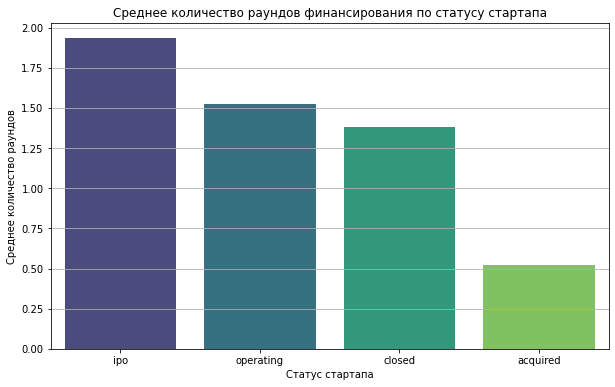

In [95]:
# Барплот по среднему количеству раундов
plt.figure(figsize=(10,6))
sns.barplot(data=rounds_by_status_mean, x='status', y='funding_rounds', palette='viridis')
plt.title('Среднее количество раундов финансирования по статусу стартапа')
plt.xlabel('Статус стартапа')
plt.ylabel('Среднее количество раундов')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()

In [96]:
# Выводы по средним значениям
for idx, row in rounds_by_status_mean.iterrows():
    print(f"Статус '{row['status']}': среднее количество раундов = {row['funding_rounds']:.2f}")

Статус 'ipo': среднее количество раундов = 1.93
Статус 'operating': среднее количество раундов = 1.52
Статус 'closed': среднее количество раундов = 1.38
Статус 'acquired': среднее количество раундов = 0.52


**Выводы:**

Компании, которые вышли на IPO, привлекли около 2 раундов финансирования и, вероятно, имели больший размер инвестиций.
Компании со статусом 'operating' в среднем имеют 1,5 раунда, что, возможно, говорит о том, что компании работают на ранней стадии и успешно функционируют уже долгое время без необходимости привлечения новых инвестиций.
Компании, прекратившие свою деятельнось, имели в среднем 1,4 раунда.
Приобретённые компании имели меньше раундов в среднем, что может говорить о приобретении ранних стадиях или меньших инвестициях.

-----

Расчитаем кумулятивную вероятность приобретения страртапа в зависимости от количества рауднов финасирования.

In [97]:
# Кумулятивная вероятность приобретения стартапа в зависимости от раундов финансирования
# Создаем датафрейм только с нужными столбцами
df_acq = df_company_filtred[['funding_rounds', 'status']].copy()

In [98]:
# Создаем бинарный столбец: 1 если статус "acquired", иначе 0
df_acq['is_acquired'] = (df_acq['status'] == 'acquired').astype(int)

In [99]:
# Считаем общее количество стартапов и количество приобретённых для каждого funding_rounds
rounds_counts = df_acq.groupby('funding_rounds').agg(
    total=('status', 'count'),
    acquired=('is_acquired', 'sum')
).reset_index()

In [100]:
# Считаем кумулятивные суммы
rounds_counts['cum_total'] = rounds_counts['total'].cumsum()
rounds_counts['cum_acquired'] = rounds_counts['acquired'].cumsum()

In [101]:
# Кумулятивная вероятность приобретения стартапа
rounds_counts['cum_prob_acquired'] = rounds_counts['cum_acquired'] / rounds_counts['cum_total']

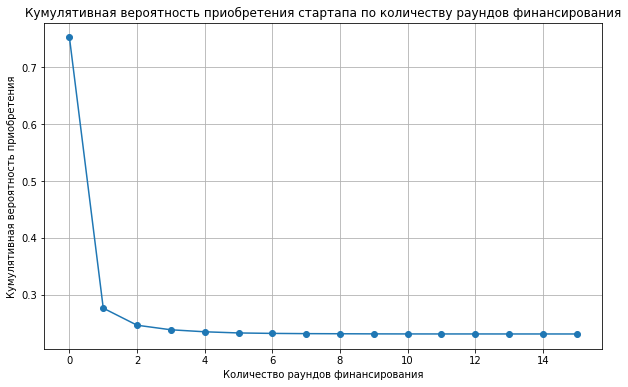

In [102]:
# График
plt.figure(figsize=(10,6))
plt.plot(rounds_counts['funding_rounds'], rounds_counts['cum_prob_acquired'], marker='o')
plt.title('Кумулятивная вероятность приобретения стартапа по количеству раундов финансирования')
plt.xlabel('Количество раундов финансирования')
plt.ylabel('Кумулятивная вероятность приобретения')
plt.grid(True)
plt.show()

Высокая вероятность приобретения на ранних этапах: На начальных раундах (0-1 раунд) вероятность приобретения стартапа была максимально высокой (~0.75-0.30), что указывает на то, что стартапы с меньшим числом раундов более подвержены приобретению.

Быстрый спад после первого раунда: вероятность значительно снижается, что говорит о том, что большинство приобретений происходят в раннии этапы развития стартапа.

Низкое значение при большом числе раундов: При увеличении количества раундов (более 2) вероятность стабильно низкая (~0.25-0.28), что свидетельствует о малой вероятности приобретения стартапа с большим количеством раундов финансирования.

----
**Вывод:**

Чем больше раундов финансирования прошло у стартапа, тем ниже вероятность его приобретения, что может свидетельствовать о том, что зрелые или более успешно финансируемые компании менее склонны к продаже или приобретению.

----


## Итоговый вывод и рекомендации



В рамках исследования были проанализированы датасеты, содержащие информацию о стартапах и сотрудниках.

**Выводы о данных в целом, их предобработке:**

- Использование столбца с именем `network_username` для объединения данных: количество уникальных значений в столбце company_id более чем в 10 раз превосходит количество совпадающих значений в столбцах network_username. При таком низком пороге использовать столбцы с именем `network_username` для объединения данных невозможно. Кроме того, исходя из визуального анализа строк, значения network_username в датафрейме df_company_and_rounds формируется из названия компании, а в датафрейме df_people формируется из имени и фамилии. Возможно, наличие совпадающих значений обусловлено наименованием компании в честь сотрудника (скорее всего, основателя стартапа).

- В ходе исследования было установлено, что что датасет company_and_rounds.csv был получен путем объединения 2х таблиц, одна из которых содержала общие данные о компаниях, вторая - об их финансировании. Данные датасета были разделены на 2: один содержит общие сведения о компаниях (df_company), а второй об этапах финансирования (df_funding_round). Данные новых датафреймов предобработаны (удалены дублирующие значения, пустые строки).

-------


**Выводы по итогу анализа данных о сотрудниках:** 

- Количество пропусков в данных, содержащих информацию о компании, соствляет 85%. Это значение является высоким, в связи с чем к полученным результатам исследования следует отнестись критически.
- Данные о количестве сотрудниках, для которых указана информация о компании, характеризуются небольшим размахом: медиана и среднее близки по значеним, стандартное отклонение также небольшое. 75% данных содержат значение 1 сотрудник. Можно предположить, что в подавляющем большинстве стартапов единственным сотрудником является его учредитель.
- Согласно графику boxplot, наблюдаемый максимум находится в пределах 4 сотрудников. Так как подавляющее большинство компаний имеют 1 сотрдуника, выделим этот параметр в отдельную категорию. Далее добавим категории по 2, 3, 4 сотрудника (вероятно, также может быть связано с количеством основателей). Стартапы, где сотрудников больше 5 (что совпадает с выбросами в даннх), выделим в отделбную категорию.
- Средняя доля сотрудников без информации об образовании в каждой из групп примерно одинаковая (46-50%).
- Для объединения данных таблицы degrees.csv (информация о типе образования сотрудника) с другими, содержащими информацию о работнаках, возможно использовать столбец "object_id" (идентификатор сотрудника), предварительно удалив префикс "d:".

----------

**Выводы об инвестиционной деятельности:**

- В 2005 году типичный размер собранных в рамках одного раунда финансирования средств был максимален (5.5 млн USD). В 2013 году наблюдался рост размера собранных в рамках одного раунда финансирования средств (с 1 млн USD в 2012 году до 1.2 млн USD), при этом количество раундов также увеличилось (с 9970 в 2012 году до 11072).

- Анализ выбросов: статистические показатели рассчитывались для 27 874 компаний. Среднее значение финансирования равно почти 15 млн USD, в то время как медианное значение - 2,56 млн USD. Стандартное отклонение составляет почти 67,8 млн USD. Таким образом, данные имеют большой разброс. Метод describe отлично подходит для нахождения типичных значений описательной статистики и подтвердил выводы, сделанные по итогам графичиского анализа.

- Из имеющихся данных нельзя сделать однозначный вывод о причинах продажи компании за 0 или 1 USD. Можно предположить, что при изначальном финансировании была использована конструкция опциона, когда инвестор получает долю в компании взамен ранее предоставленных инвестиций. Однозначный вовод можно сделать при наличии данных об инвесторе и покупателе.

- Если инвестор готов пойти на риск в ожидании высокой прибыли, то ему следует рассмотреть стартапы, находящиеся в правом верхнем углу графика:

Biotech (высокая медианная цена продажи (120 млн USD) и значительный разброс цен (более 300 млн USD);

ecommerce (высокая медианная цена (100 млн USD) и значительный разброс цен ( более 300 млн USD);

security и cleantech (оба имеют высокие цены (148 млн USD и 161 млн USD соответственно, разброс цен у них стоставляет 260 млн USD).

Для долгосрочных портфельных инвестиций, напротив, подойдут категории, характеризующиеся меньшей волатильностью цен и большей выборкой (software, web, enterprice).

- Типичное значение количества раундов для каждого возможного статуса стартапа характеризуется следующими значениями:

Статус 'ipo': среднее количество раундов = 1.93

Статус 'operating': среднее количество раундов = 1.52

Статус 'closed': среднее количество раундов = 1.38

Статус 'acquired': среднее количество раундов = 0.52

Компании, которые вышли на IPO, привлекли около 2 раундов финансирования и, вероятно, имели больший размер инвестиций.
Компании со статусом 'operating' в среднем имеют 1,5 раунда, что, возможно, говорит о том, что компании работают на ранней стадии и успешно функционируют уже долгое время без необходимости привлечения новых инвестиций.
Компании, прекратившие свою деятельнось, имели в среднем 1,4 раунда.
Приобретённые компании имели меньше раундов в среднем, что может говорить о приобретении ранних стадиях или меньших инвестициях.

- На начальных раундах (0-1 раунд) вероятность приобретения стартапа была максимально высокой (0.75-0.30), что указывает на то, что стартапы с меньшим числом раундов более подвержены приобретению. При увеличении количества раундов (более 2) вероятность стабильно низкая (0.25-0.28), что свидетельствует о малой вероятности приобретения стартапа с большим количеством раундов финансирования.
Чем больше раундов финансирования прошло у стартапа, тем ниже вероятность его приобретения, что может свидетельствовать о том, что зрелые или более успешно финансируемые компании менее склонны к продаже или приобретению.
